# Data analysis
How many files are there in LibriSpeech splits for VoicePrivacy challenge?

In [2]:
%matplotlib inline
from pathlib import Path
import numpy as np 
import matplotlib.pyplot as plt
import time

In [8]:
import torchaudio 
from speechbrain.dataio.preprocess import AudioNormalizer

def load_audio(path):
    signal, sr = torchaudio.load(path, channels_first=False)
    return AudioNormalizer()(signal, sr)

In [17]:
base_dir = "../data/LibriSpeech"

def count_audiofile_stats(split_name="test-clean"):
    all_speaker_audio_lens = []
    total_time = 0
    num_utterances = 0
    for speaker in Path(base_dir, split_name).iterdir():
        if not speaker.is_dir(): 
            continue 
        
        audio_lengths = []
        for session in speaker.iterdir():
            if not session.is_dir():
                continue 
            
            for utt in session.iterdir():
                if not str(utt).endswith("flac"):
                    continue 
                #print("Speaker: {}, session: {}, utterance: {}, filename: {}".format(speaker.name, session.name, utt.name, utt))

                signal, sr = torchaudio.load(str(utt), channels_first=False)
                #print("sr=", sr)  # 16k
                #print("signal.shape", signal.shape) # (N,1)
                audio_len = signal.size(0) / sr  # in seconds
                audio_lengths.append(audio_len)

                total_time += audio_len 
                num_utterances += 1
            
        speaker_avg_len = np.mean(audio_lengths)
        all_speaker_audio_lens.append(speaker_avg_len)

    print ("Speaker number: {}".format(len(all_speaker_audio_lens)))
    print ("There are {} utterances; up to {:.2f} hours".format(
        num_utterances, total_time / 3600.0))

    return all_speaker_audio_lens

Speaker number: 40
There are 2620 utterances; up to 5.40 hours


Text(0, 0.5, 'Occurrence')

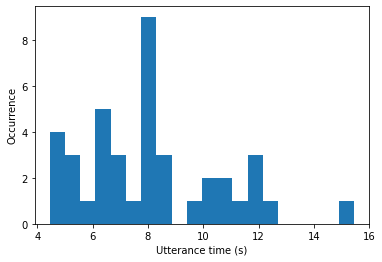

In [18]:
all_speaker_audio_lens = count_audiofile_stats("test-clean")  # 5.1s
plt.hist(all_speaker_audio_lens, bins=20)
plt.xlabel("Utterance time (s)")
plt.ylabel("Occurrence")

Speaker number: 40
There are 2703 utterances; up to 5.39 hours


Text(0, 0.5, 'Occurrence')

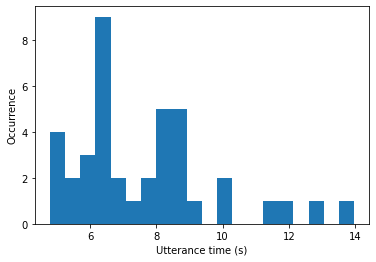

In [19]:
all_speaker_audio_lens = count_audiofile_stats("dev-clean")  # 5.1s
plt.hist(all_speaker_audio_lens, bins=20)
plt.xlabel("Utterance time (s)")
plt.ylabel("Occurrence")

Speaker number: 251
There are 28539 utterances; up to 100.59 hours


Text(0, 0.5, 'Occurrence')

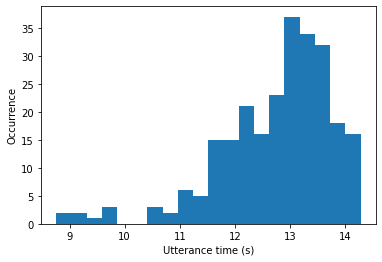

In [20]:
all_speaker_audio_lens = count_audiofile_stats("train-clean-100")  # 1 min 28.5s
plt.hist(all_speaker_audio_lens, bins=20)
plt.xlabel("Utterance time (s)")
plt.ylabel("Occurrence")